In [1]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/aashish-chaubey/english-premier-league/master/data.csv')

Populating the interactive namespace from numpy and matplotlib


## Data Cleaning
- Convert the Data in the appropriate standard format <br />
  - Fixing the date to the date appropriate date format

In [2]:
df['Date'] = pd.to_datetime(df['Date'])

## Plotting the data

### top winning teams at Home

In [8]:
gdf = df.groupby(by=["HomeTeam"])
labels = []
for team, teamdf in gdf:
  if teamdf[(teamdf['HomeTeam'] == team) & ((teamdf['FTR'] == 'H'))].shape[0] > 200:
    labels.append(team)

In [6]:
wins, loss, draws = [], [], []
for team in labels:
  wins.append(df[(df['HomeTeam'] == team) & ((df['FTR'] == 'H'))].shape[0])
  loss.append(df[(df['HomeTeam'] == team) & ((df['FTR'] == 'A'))].shape[0])
  draws.append(df[(df['HomeTeam'] == team) & ((df['FTR'] == 'D'))].shape[0])

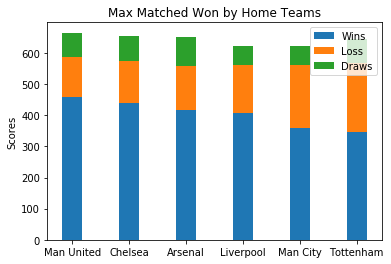

In [44]:
width = 0.35
fig, ax = plt.subplots()

ax.bar(labels, wins, width, label='Wins')
ax.bar(labels, loss, width, label='Loss', bottom=np.array(wins))
ax.bar(labels, draws, width, label='Draws', bottom=np.array(wins)+np.array(loss))

ax.set_ylabel('Scores')
ax.set_title('Max Matched Won by Home Teams')
ax.legend(loc="upper right")

plt.savefig('home_wins.png')

plt.show()

### Top winning teams overall

In [38]:
overall_matches_won = []
total_matches_won = 0
overall_matches_lost = []
total_matches_lost = 0
overall_matches_draw = []
total_matches_draw = 0

all_teams = df['HomeTeam'].unique()
for team in all_teams:
    selected_team_matches = df[df['HomeTeam'].str.contains(team) | df['AwayTeam'].str.contains(team)]
    total_matches_won = selected_team_matches[(selected_team_matches['HomeTeam'] == team) & ((selected_team_matches['FTR'] == 'H'))].shape[0] + selected_team_matches[(selected_team_matches['AwayTeam'] == team) & ((selected_team_matches['FTR'] == 'A'))].shape[0]
    overall_matches_won.append(total_matches_won)
    total_matches_loss = selected_team_matches[(selected_team_matches['HomeTeam'] == team) & ((selected_team_matches['FTR'] == 'A'))].shape[0] + selected_team_matches[(selected_team_matches['AwayTeam'] == team) & ((selected_team_matches['FTR'] == 'H'))].shape[0]
    overall_matches_lost.append(total_matches_loss)
    total_matches_draw = selected_team_matches[(selected_team_matches['HomeTeam'] == team) & ((selected_team_matches['FTR'] == 'D'))].shape[0] + selected_team_matches[(selected_team_matches['AwayTeam'] == team) & ((selected_team_matches['FTR'] == 'D'))].shape[0]
    overall_matches_draw.append(total_matches_draw)
#     print(f"Team: {team} \nTotal Wins: {total_matches_won}\nTotal Lost: {total_matches_lost}\nTotal Drawn: {total_matches_draw}\n")

In [35]:
leading_winners = {
    'teams': all_teams,
    'wins': overall_matches_won,
    'loss': overall_matches_lost,
    'draw': overall_matches_draw
}
leading_winners = pd.DataFrame(leading_winners)
leading_winners.sort_values(by='wins', ascending=False, inplace=True)

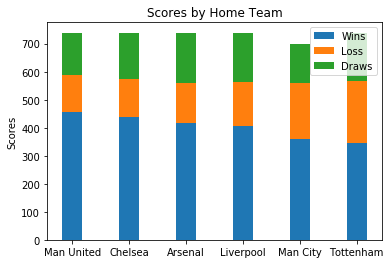

In [43]:
width = 0.35
fig, ax = plt.subplots()

labels = list(leading_winners['teams'][:6])
wins = list(leading_winners['wins'][:6])
loss = list(leading_winners['loss'][:6])
draw = list(leading_winners['draw'][:6])

ax.bar(labels, wins, width, label='Wins')
ax.bar(labels, loss, width, label='Loss', bottom=np.array(wins))
ax.bar(labels, draw, width, label='Draws', bottom=np.array(wins)+np.array(loss))

ax.set_ylabel('Scores')
ax.set_title('Wins in overall mar')
ax.legend(loc="upper right")

plt.savefig('overall_wins.png')

plt.show()